In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyRegressor
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
seed=0

In [2]:
data = pd.read_csv('data/doc_embedding/doc2vec_5.csv.gz', compression='gzip', low_memory=False, lineterminator='\n', index_col=None)
data['text_length'] = data['text'].str.len()
y_log = []
for x in data['{}_count'.format("like")].tolist():
    y_log.append(np.log(x + 1))
data['{}_count(log)'.format("like")] = y_log
y_log = []
for x in data['{}_count'.format("retweet")].tolist():
    y_log.append(np.log(x + 1))
data['{}_count(log)'.format("retweet")] = y_log
data

,Unnamed: 0,id,text,create_at,geo,retweet_count,like_count,hashtags,username,following,...,user_likes_count,cleaned_text,0,1,2,3,4,text_length,like_count(log),retweet_count(log)
0,0,1.591219e+18,'Like a 1930s Dictator': Vitalik Buterin Lays ...,2022-11-11 23:59:59+00:00,"For now, Earth",0.0,1.0,#ftx,johnmorganFL,630.0,...,111.0,like dictator vitalik buterin lay sam bankmanf...,-0.190527,-0.363088,-0.311832,0.111005,-0.058337,102,0.693147,0.000000
1,1,1.591219e+18,"💸 $1,000 #Giveaway 💸\n\nWe'll select 10 winner...",2022-11-11 23:59:57+00:00,Panama,8866.0,0.0,#ftx,KuKzNFT,594.0,...,8272.0,giveaway select winner randomly award account...,-0.037449,-0.546747,-0.165052,-0.033582,0.046071,294,0.000000,9.090092
2,2,1.591219e+18,#FTX crazy Shit! #Crypto https://t.co/2GO4X3u2pt,2022-11-11 23:59:55+00:00,"Seattle, WA",0.0,0.0,#ftx,MeAndMySports,315.0,...,1572.0,ftx crazy shit crypto,0.025254,-0.219788,-0.274583,0.085095,-0.137927,48,0.000000,0.000000
3,3,1.591219e+18,"Yo @SBF_FTX, draw me like one of your French g...",2022-11-11 23:59:53+00:00,"London, England",0.0,0.0,#ftx,thedoc7er,1513.0,...,3626.0,draw like french girl ftxcrash ftx binance czb...,-0.170994,-0.371573,-0.023886,-0.041357,-0.136645,145,0.000000,0.000000
4,4,1.591219e+18,@BitcoinMagazine you you simpletons cant under...,2022-11-11 23:59:51+00:00,NaN,0.0,1.0,#ftx,jesseypaul4,123.0,...,81.0,simpleton understand crypto wallet like exodus...,-0.198903,-0.373405,-0.227012,0.158047,-0.044631,296,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157503,157503,1.591565e+18,"🔴 WAR IN 🇺🇦: FRANCE 24 reporter @cntrentF24, w...",2022-11-12 22:52:11+00:00,Hauts de France 🇫🇷 🇪🇺,20.0,0.0,#ukraine,annetteashley61,10522.0,...,291392.0,war france reporter spend lot time report ukra...,-0.062705,-0.128675,-0.055065,0.015298,-0.156906,247,0.000000,3.044522
157504,157504,1.591565e+18,People still celebrating in Kherson and I love...,2022-11-12 22:52:09+00:00,"Belgrade, Serbia, Europe",1041.0,0.0,#ukraine,svrhovac,222.0,...,16675.0,people celebrate kherson love bit ukraine kherson,-0.058628,-0.215833,-0.425018,0.128180,-0.058321,106,0.000000,6.948897
157505,157505,1.591565e+18,A remarkable story #Ukraine https://t.co/eeBLc...,2022-11-12 22:52:04+00:00,Guernsey,0.0,0.0,#ukraine,TimBarker10,2668.0,...,5927.0,remarkable story ukraine,0.029643,-0.241812,-0.006721,0.150215,-0.148847,51,0.000000,0.000000
157506,157506,1.591565e+18,#Ukraine: Relief in liberated #Kherson after 8...,2022-11-12 22:52:02+00:00,🇮🇪🇪🇺🇺🇦🎮,189.0,0.0,#ukraine,Aontaithe2021,5001.0,...,308109.0,ukraine relief liberated kherson month putin ...,0.223750,-0.170265,0.191466,0.264151,-0.158802,220,0.000000,5.247024


In [23]:
data['hashtags'].value_counts()

#ukraine          27000
#covid            27000
#christmas        26692
#vegan            26651
#climatechange    26089
#ftx              24076
Name: hashtags, dtype: int64

In [4]:
count_dist = pd.DataFrame(data['like_count'].value_counts()).reset_index()
count_dist.columns = ['number of likes', 'like_count']
count_dist.sort_values(by=['number of likes'])
count_dist.head(10)


,number of likes,like_count
0,0.0,134200
1,1.0,9195
2,2.0,3983
3,3.0,2257
4,4.0,1468
5,5.0,959
6,6.0,730
7,7.0,516
8,8.0,467
9,9.0,331


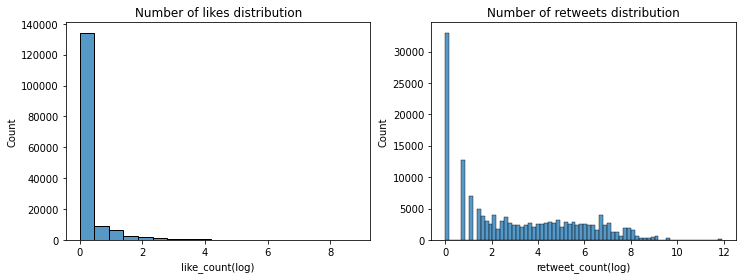

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set(title='Number of likes distribution')
ax2.set(title='Number of retweets distribution')
sns.histplot(ax=ax1, data=data, x='like_count(log)')
sns.histplot(ax=ax2, data=data, x='retweet_count(log)')
plt.savefig("result/dist.png")

In [5]:
print(data[data['like_count'] == 0].shape[0])
print(data[data['like_count'] == 1].shape[0])
print(data[data['like_count'] == 2].shape[0])
print(data[(data['like_count'] >= 2) & (data['like_count'] < 5)].shape[0])
print(data[(data['like_count'] >= 5) & (data['like_count'] <= 10)].shape[0])
print(data[data['like_count'] >= 11].shape[0])

134200
9195
3983
7708
3269
3136


In [5]:
print(data[data['retweet_count'] == 0].shape[0])
print(data[(data['retweet_count'] >= 0) & (data['retweet_count'] < 50)].shape[0] / data.shape[0])
print(data[(data['retweet_count'] >= 50) & (data['retweet_count'] < 300)].shape[0] / data.shape[0])

32989
0.6136386723214059
0.1778322370927191
84472


Bin the likes count into 6 classes and retweet count into 2 classes.

In [3]:
def like_classify(x):
    if x <= 2:
        return int(x)
    elif 3 <= x <= 4:
        return 3
    elif 5 <= x <= 10:
        return 4
    else:
        return 5

def retweet_classify(x):
    if x <= 300:
        return 0
    else:
        return 1

data['like_count_class'] = data['like_count'].apply(like_classify)
data['retweet_count_class'] = data['retweet_count'].apply(retweet_classify)
data

,Unnamed: 0,id,text,create_at,geo,retweet_count,like_count,hashtags,username,following,...,0,1,2,3,4,text_length,like_count(log),retweet_count(log),like_count_class,retweet_count_class
0,0,1.591219e+18,'Like a 1930s Dictator': Vitalik Buterin Lays ...,2022-11-11 23:59:59+00:00,"For now, Earth",0.0,1.0,#ftx,johnmorganFL,630.0,...,-0.190527,-0.363088,-0.311832,0.111005,-0.058337,102,0.693147,0.000000,1,0
1,1,1.591219e+18,"💸 $1,000 #Giveaway 💸\n\nWe'll select 10 winner...",2022-11-11 23:59:57+00:00,Panama,8866.0,0.0,#ftx,KuKzNFT,594.0,...,-0.037449,-0.546747,-0.165052,-0.033582,0.046071,294,0.000000,9.090092,0,1
2,2,1.591219e+18,#FTX crazy Shit! #Crypto https://t.co/2GO4X3u2pt,2022-11-11 23:59:55+00:00,"Seattle, WA",0.0,0.0,#ftx,MeAndMySports,315.0,...,0.025254,-0.219788,-0.274583,0.085095,-0.137927,48,0.000000,0.000000,0,0
3,3,1.591219e+18,"Yo @SBF_FTX, draw me like one of your French g...",2022-11-11 23:59:53+00:00,"London, England",0.0,0.0,#ftx,thedoc7er,1513.0,...,-0.170994,-0.371573,-0.023886,-0.041357,-0.136645,145,0.000000,0.000000,0,0
4,4,1.591219e+18,@BitcoinMagazine you you simpletons cant under...,2022-11-11 23:59:51+00:00,NaN,0.0,1.0,#ftx,jesseypaul4,123.0,...,-0.198903,-0.373405,-0.227012,0.158047,-0.044631,296,0.693147,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157503,157503,1.591565e+18,"🔴 WAR IN 🇺🇦: FRANCE 24 reporter @cntrentF24, w...",2022-11-12 22:52:11+00:00,Hauts de France 🇫🇷 🇪🇺,20.0,0.0,#ukraine,annetteashley61,10522.0,...,-0.062705,-0.128675,-0.055065,0.015298,-0.156906,247,0.000000,3.044522,0,0
157504,157504,1.591565e+18,People still celebrating in Kherson and I love...,2022-11-12 22:52:09+00:00,"Belgrade, Serbia, Europe",1041.0,0.0,#ukraine,svrhovac,222.0,...,-0.058628,-0.215833,-0.425018,0.128180,-0.058321,106,0.000000,6.948897,0,1
157505,157505,1.591565e+18,A remarkable story #Ukraine https://t.co/eeBLc...,2022-11-12 22:52:04+00:00,Guernsey,0.0,0.0,#ukraine,TimBarker10,2668.0,...,0.029643,-0.241812,-0.006721,0.150215,-0.148847,51,0.000000,0.000000,0,0
157506,157506,1.591565e+18,#Ukraine: Relief in liberated #Kherson after 8...,2022-11-12 22:52:02+00:00,🇮🇪🇪🇺🇺🇦🎮,189.0,0.0,#ukraine,Aontaithe2021,5001.0,...,0.223750,-0.170265,0.191466,0.264151,-0.158802,220,0.000000,5.247024,0,0


In [4]:
all_features = [
    'following',
    'followers', 
    'user_total_tweets',
    'user_likes_count', 
    '0', '1', '2', '3', '4',
    'text_length'
]

In [5]:
X = data[all_features]
X.head(1)

,following,followers,user_total_tweets,user_likes_count,0,1,2,3,4,text_length
0,630.0,28492.0,240872.0,111.0,-0.190527,-0.363088,-0.311832,0.111005,-0.058337,102


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, data['retweet_count(log)'], random_state=seed)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
dummy = DummyRegressor(strategy='constant', constant=0)
dummy.fit(X_train_scaled, y_train)
mean_squared_error(y_test, dummy.predict(X_test_scaled))

16.717656665130708

# Models

### Classification

In [6]:
names = [
    'Logistic regression',
    # 'SVM',
    # 'MLP classifier',
    'Decision tree',
    'Random forest',
    'Adaboost',
    'KNN'
]

classifiers = [
    LogisticRegression(max_iter=10000),
    # SVC(random_state=seed),
    # MLPClassifier(hidden_layer_sizes=(100, 50), random_state=seed, max_iter=10000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    KNeighborsClassifier()
]

params = [
              {'clf__C': np.logspace(-2, 2, 10)},
               # 'pca__n_components': [10]},
            #   {'clf__C': [0.1, 1, 10], 
            #    'clf__kernel': ['linear']},
            #   {'clf__alpha': [1e-3, 0.01, 0.1],
            #    'pca__n_components': [10]},
              {'clf__max_depth': [5, 10, 50, None]},
               # 'pca__n_components': [10]},
              {'clf__n_estimators': [10], 
               'clf__max_depth': [10, 50, None]},
               # 'pca__n_components': [10]},
              {'clf__n_estimators': [10]},
               # 'pca__n_components': [10]},
              {'clf__n_neighbors': [4, 5, 6]},
               # 'clf__weights': ['uniform', 'distance'],
               # 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               # 'pca__n_components': [10]}
         ]

X_train, X_test, y_train, y_test = train_test_split(X, data['retweet_count_class'], random_state=seed)

for name, classifier, params in zip(names, classifiers, params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        # ('pca', PCA(random_state=0)),
        ('clf', classifier),
    ])
    grid_search = GridSearchCV(pipe, param_grid=params, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("{} accuracy: {}".format(name, score))
    print("best params:", grid_search.best_params_)

Logistic regression accuracy: 0.7876425324427966
best params: {'clf__C': 0.21544346900318834}
Decision tree accuracy: 0.803209995682759
best params: {'clf__max_depth': 10}
Random forest accuracy: 0.8081113340274779
best params: {'clf__max_depth': 50, 'clf__n_estimators': 10}
Adaboost accuracy: 0.788125047616629
best params: {'clf__n_estimators': 10}
KNN accuracy: 0.7750717423876883
best params: {'clf__n_neighbors': 6}


### Regression

In [7]:
names = [
    'Linear regression',
    # 'SVM',
    # 'MLP classifier',
    'Decision tree',
    'Random forest',
    'Gradient boost',
    'KNN'
]

regressors = [
    LinearRegression(),
    # SVC(probability=True),
    # MLPClassifier(hidden_layer_sizes=(100, 50), random_state=seed, max_iter=10000),
    DecisionTreeRegressor(random_state=seed),
    RandomForestRegressor(random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    KNeighborsRegressor()
]

params = [
              {},
#               {'clf__C': [0.1, 1, 10], 
#                'clf__gamma': [1, 0.1, 0.01]},
            #   {'clf__alpha': [1e-3, 0.01, 0.1],
            #    'pca__n_components': [10]},
              {'clf__max_depth': [5, 10, 50, None]},
               # 'pca__n_components': [10]},
              {'clf__n_estimators': [10], 
               'clf__max_depth': [10, 50, None]},
               # 'pca__n_components': [10]},
              {'clf__n_estimators': [10]},
              {'clf__n_neighbors': [4, 5, 6]},
               # 'clf__weights': ['uniform', 'distance'],
               # 'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               # 'pca__n_components': [10]}
         ]

(array([32989., 19858.,  8791.,  9638., 10138.,  8006.,  8413.,  8672.,
         9073.,  9109.]),
 array([0.        , 0.57071103, 1.14142205, 1.71213308, 2.28284411,
        2.85355513, 3.42426616, 3.99497719, 4.56568821, 5.13639924,
        5.70711026]),
 <BarContainer object of 10 artists>)

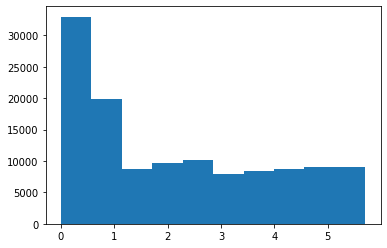

In [8]:
data0 = data[data['retweet_count_class'] == 0]
X0 = data0[all_features]
y0 = []
for x in data0['retweet_count'].tolist():
    y0.append(np.log(x + 1))
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, random_state=seed)
# X1_train_scaled = StandardScaler().fit_transform(X1_train)
# X1_test_scaled = StandardScaler().fit_transform(X1_test)
plt.hist(y0)

In [10]:
for name, regressor, param in zip(names, regressors, params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        # ('pca', PCA(random_state=seed)),
        ('clf', regressor),
    ])
    grid_search = GridSearchCV(pipe, param_grid=param, scoring='neg_mean_squared_error')
    grid_search.fit(X0_train, y0_train)
    score = grid_search.score(X0_test, y0_test)
    print("{} score: {}".format(name, -score))
    print("best params:", grid_search.best_params_)

Linear regression score: 3.227233260414525
best params: {}
Decision tree score: 2.5531116912204768
best params: {'clf__max_depth': 10}
Random forest score: 2.3828262807268623
best params: {'clf__max_depth': 10, 'clf__n_estimators': 10}
Gradient boost score: 2.8519252175794945
best params: {'clf__n_estimators': 10}
KNN score: 3.505001102240227
best params: {'clf__n_neighbors': 6}


(array([8.686e+03, 9.275e+03, 6.074e+03, 5.599e+03, 1.566e+03, 1.138e+03,
        3.210e+02, 0.000e+00, 2.000e+00, 1.600e+02]),
 array([ 5.70711026,  6.32679594,  6.94648162,  7.5661673 ,  8.18585298,
         8.80553866,  9.42522434, 10.04491002, 10.66459569, 11.28428137,
        11.90396705]),
 <BarContainer object of 10 artists>)

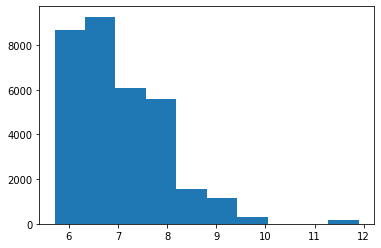

In [17]:
data1 = data[data['retweet_count_class'] == 1]
X1 = data1[all_features]
y1 = np.log(data1['retweet_count'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=seed)
# X1_train_scaled = StandardScaler().fit_transform(X1_train)
# X1_test_scaled = StandardScaler().fit_transform(X1_test)
plt.hist(y1)

In [18]:
for name, regressor, param in zip(names, regressors, params):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(random_state=seed)),
        ('clf', regressor),
    ])
    grid_search = GridSearchCV(pipe, param_grid=param, scoring='neg_mean_squared_error')
    grid_search.fit(X1_train, y1_train)
    score = grid_search.score(X1_test, y1_test)
    print("{} score: {}".format(name, -score))
    print("best params:", grid_search.best_params_)

Linear regression score: 0.8777176238589457
best params: {}
Decision tree score: 0.8844165575229342
best params: {'clf__max_depth': 5}
Random forest score: 0.8478049009018156
best params: {'clf__max_depth': 10, 'clf__n_estimators': 10}
Gradient boost score: 0.8722766352997483
best params: {'clf__n_estimators': 10}
KNN score: 0.9407331432325825
best params: {'clf__n_neighbors': 6}


### Two phrases prediction

In [6]:
goal = "like"

def categorization(x, t_pairs):
    if len(t_pairs) == 1:
        if x <= t_pairs[0]:
            return 0
        else:
            return 1
    elif len(t_pairs) == 2:
        if x <= t_pairs[0]:
            return 0
        elif t_pairs[0] < x <= t_pairs[1]:
            return 1
        else:
            return 2
    elif len(t_pairs) == 3:
        if x <= t_pairs[0]:
            return 0
        elif t_pairs[0] < x <= t_pairs[1]:
            return 1
        elif t_pairs[1] < x <= t_pairs[2]:
            return 2
        else:
            return 3

def categorize_data(data, t):
    data['{}_count_class'.format(goal)] = \
        data['{}_count'.format(goal)].apply(categorization, t_pairs=t)
    fractions = []
    for c in range(len(t)):
        fractions.append(data[data['{}_count_class'.format(goal)] == c].shape[0] / data.shape[0])
    return data, fractions

def classify(X_train_scaled, X_test_scaled, y_label_train, y_label_test, num_class):
    # train classifier
    clf = RandomForestClassifier(random_state=seed, max_depth=10)
    clf.fit(X_train_scaled, y_label_train)
    pred_class = clf.predict(X_test_scaled)
    acc = accuracy_score(pred_class, y_label_test) 
    print("acc:", acc)   
    return pred_class

acc: 0.859562688879295


100%|██████████| 39377/39377 [04:04<00:00, 161.10it/s]


(array([1.43395e+05, 6.24000e+03, 4.47100e+03, 1.96600e+03, 7.90000e+02,
        3.31000e+02, 1.99000e+02, 8.20000e+01, 2.70000e+01, 7.00000e+00]),
 array([-0.5       ,  0.43410143,  1.36820286,  2.30230429,  3.23640572,
         4.17050716,  5.10460859,  6.03871002,  6.97281145,  7.90691288,
         8.84101431]),
 <BarContainer object of 10 artists>)

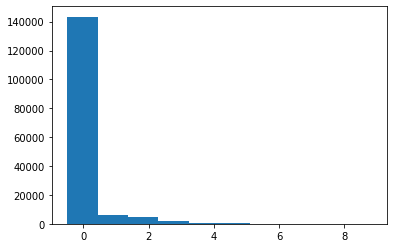

In [9]:
num_class = 2
data['text_length'] = data['text'].str.len()
y_log = []
for x in data['{}_count'.format(goal)].tolist():
    if x == 0:
        y_log.append(-0.5)
    else:
        y_log.append(np.log(x))
data['{}_count(log)'.format(goal)] = y_log
data_tranformed, frac = categorize_data(data.copy(), [0])
data_tranformed.like_count_class.unique()
X = data_tranformed[all_features]
label = data_tranformed['{}_count_class'.format(goal)]

X_train, X_test, y_label_train, y_label_test = train_test_split(X, label, random_state=seed)
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

pred_class = classify(X_train_scaled, X_test_scaled, y_label_train, y_label_test, num_class)

# train regressor for classes separately
rfs = []
for c in range(num_class):
    idx_class = pd.DataFrame(y_label_train)[pd.DataFrame(y_label_train)['{}_count_class'.format(goal)] == c].index
    X_train_class = X_train.loc[idx_class]
    X_train_class_scaled = StandardScaler().fit_transform(X_train_class)
    y_train_log_class = data_tranformed.loc[idx_class]['{}_count(log)'.format(goal)]
    rf = RandomForestRegressor(random_state=seed, max_depth=10)
    rf.fit(X_train_class_scaled, y_train_log_class)
    rfs.append(rf)

# test
y_true_log = data_tranformed.loc[X_test.index]['{}_count(log)'.format(goal)]
pred_vals = []
for i in tqdm(range(len(pred_class))):
    for c in range(num_class):
        if pred_class[i] == c:
            pred_val = rfs[c].predict([X_test_scaled[i]])
            pred_vals.append(pred_val[0])

mse = mean_squared_error(pred_vals, y_true_log)
plt.hist(y_log)